https://github.com/jesolem/PCV \
http://programmingcomputervision.com/


In [39]:
from __future__ import print_function
import os
from PIL import Image
from pylab import *
import imtools as imt
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [7]:
im = array (Image.open('./data/empire.jpg'))
print (im.shape, im.dtype)

(800, 569, 3) uint8


In [8]:
im = array (Image.open('./data/empire.jpg').convert('L'),'f')
print (im.shape, im.dtype)

(800, 569) float32


In [9]:
im = array (Image.open('./data/empire.jpg').convert('L'))
im2 = 255 - im
im3 = (100.0/255) * im + 100
im4 = 255.0 * (im/255.0)**2

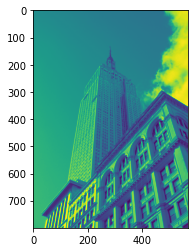

In [10]:
imshow(im)
show()

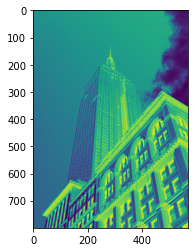

In [11]:
imshow(im2)
show()

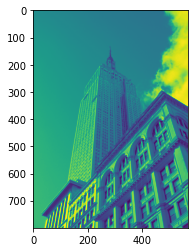

In [12]:
imshow(im3)
show()

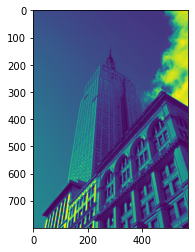

In [13]:
imshow(im4)
show()

In [14]:
print (int(im.min()),int(im.max()))
print (int(im2.min()),int(im2.max()))
print (int(im3.min()),int(im3.max()))
print (int(im4.min()),int(im4.max()))

3 255
0 252
101 200
0 255


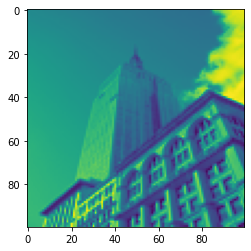

In [17]:
imshow(imt.imresize(im,(100,100)))

In [23]:
np.array([1,2,3]).cumsum()

array([1, 3, 6])

In [47]:
im = array (Image.open('./data/AquaTermi_lowcontrast.JPG').convert('L'))
im2, cdf = imt.histeq(im)

/home/de4m/GIT_CV/02. Book/01. Солем Э. - Программирование компьютерного зрения на языке Python (2016)/02. MySamples/imtools.py:23: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)


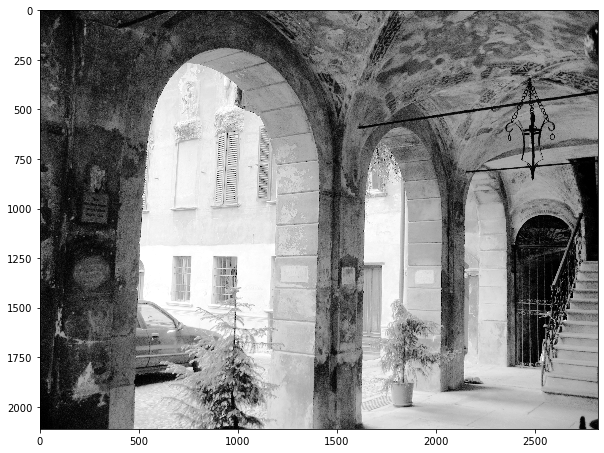

In [40]:
imshow(im2)

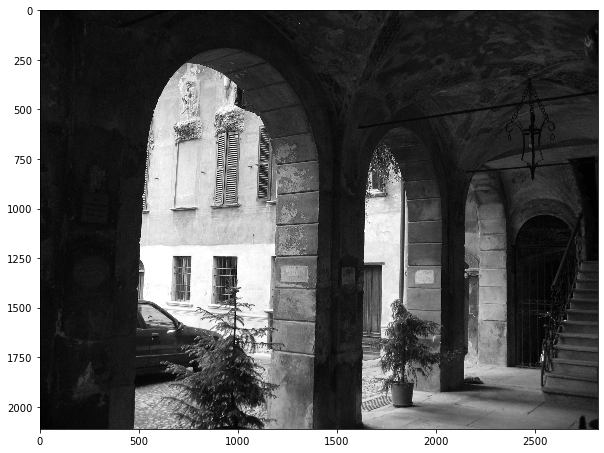

In [43]:
imshow(im)

In [45]:
mean_X = im.mean(axis=0)
im = im - mean_X

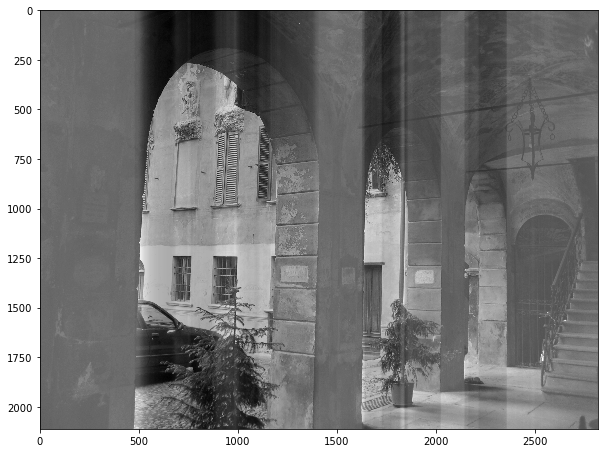

In [46]:
imshow(im)

In [48]:
import pca

In [49]:
t=pca.center(im)
imshow(t)

Exception: Matrix is not square.

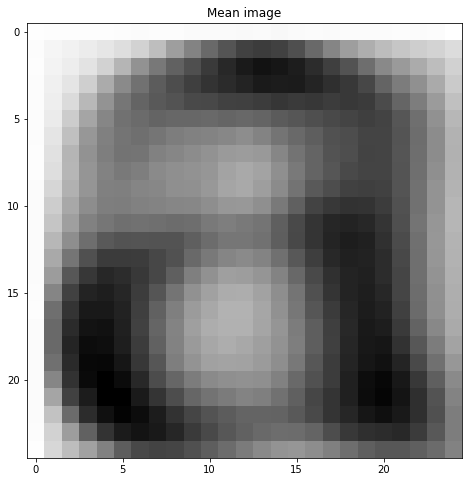

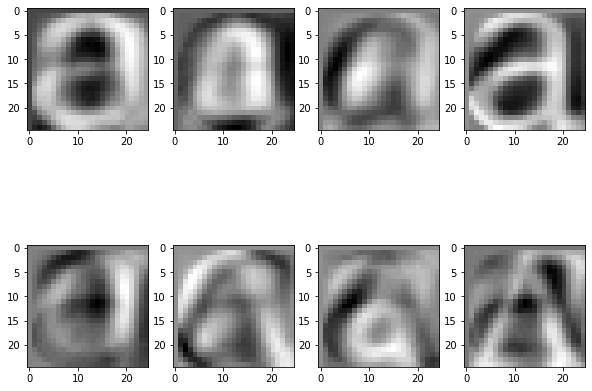

In [113]:
from PIL import Image
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pickle
import imtools as imt
import pca

# Get file list from dir
path = './data/fontimages/a_thumbs'
imlist = imt.get_imlist(path)

# Get parameters images. 
im = np.array(Image.open(imlist[0]))
m,n = im.shape[0:2]
imnbr = len(imlist)

# Create matrix for store linearized images 
immatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist],'f')

# PCA for linearized images 
V,S,immean = pca.pca(immatrix)

# Show immean
plt.figure()
plt.title('Mean image')
plt.imshow(immean.reshape(m,n))

# Show first 8 modes
plt.figure()
plt.title('First 8 modes image')
plt.gray()
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(V[i].reshape(m,n))

# Save immean and V
f = open('./data/font_pca_modes_a.pkl','wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

# Open pickle file
#with open('./data/font_pca_modes_a.pkl','rb') as f:
#    immean = pickle.load(f)
#    V = pickle.load(f)

